In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
df.iloc[:, :-1] = df.iloc[:, :-1].replace(0,np.NaN)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,NaN
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27.0,NaN
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,NaN
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47.0,1.0


In [26]:
df.iloc[:,-1]= df.iloc[:,-1].replace(np.NaN, 0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47.0,1.0


In [10]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [32]:
from sklearn.impute import SimpleImputer
z = SimpleImputer(missing_values = np.nan, strategy = 'median')
df.iloc[:, :-1] = z.fit_transform(df.iloc[:, :-1])

In [33]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.000000,72.00000,35.00,155.548223,33.600000,0.627000,50.000000,1.0
1,1.0,85.000000,66.00000,29.00,155.548223,26.600000,0.351000,31.000000,0.0
2,8.0,183.000000,64.00000,29.15,155.548223,23.300000,0.672000,32.000000,1.0
3,1.0,89.000000,66.00000,23.00,94.000000,28.100000,0.167000,21.000000,0.0
4,4.5,137.000000,40.00000,35.00,168.000000,43.100000,2.288000,33.000000,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.000000,76.00000,48.00,180.000000,32.900000,0.171000,63.000000,0.0
764,2.0,122.000000,70.00000,27.00,155.548223,36.800000,0.340000,27.000000,0.0
765,5.0,121.000000,72.00000,23.00,112.000000,26.200000,0.245000,30.000000,0.0
766,1.0,126.000000,60.00000,29.15,155.548223,30.100000,0.349000,47.000000,1.0


In [69]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
selected_columns = selector.fit_transform(df)

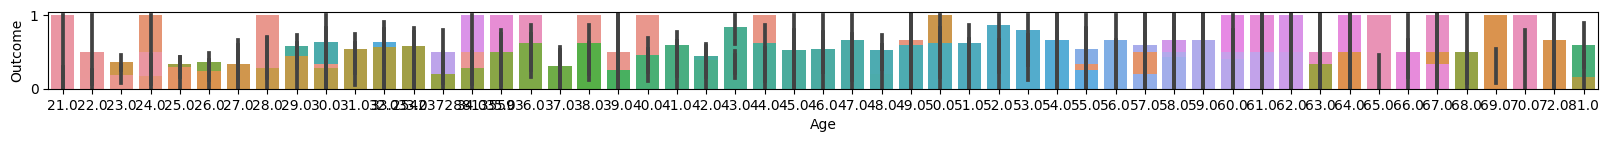

In [70]:
plt.figure(figsize=(20, 1))
plot1 = sns.barplot(data=df,x = 'Pregnancies', y ='Outcome')
plot2 = sns.barplot(data=df,x = 'Glucose', y = 'Outcome')
plot3 = sns.barplot(data=df,x = 'BloodPressure', y = 'Outcome')
plot4 = sns.barplot(data=df,x = 'SkinThickness', y = 'Outcome')
plot5 = sns.barplot(data=df,x = 'Insulin', y = 'Outcome')
plot6 = sns.barplot(data=df,x = 'BMI', y = 'Outcome')
plot7 = sns.barplot(data=df,x = 'DiabetesPedigreeFunction', y = 'Outcome')
plot8 = sns.barplot(data=df,x = 'Age', y = 'Outcome')
plt.show()

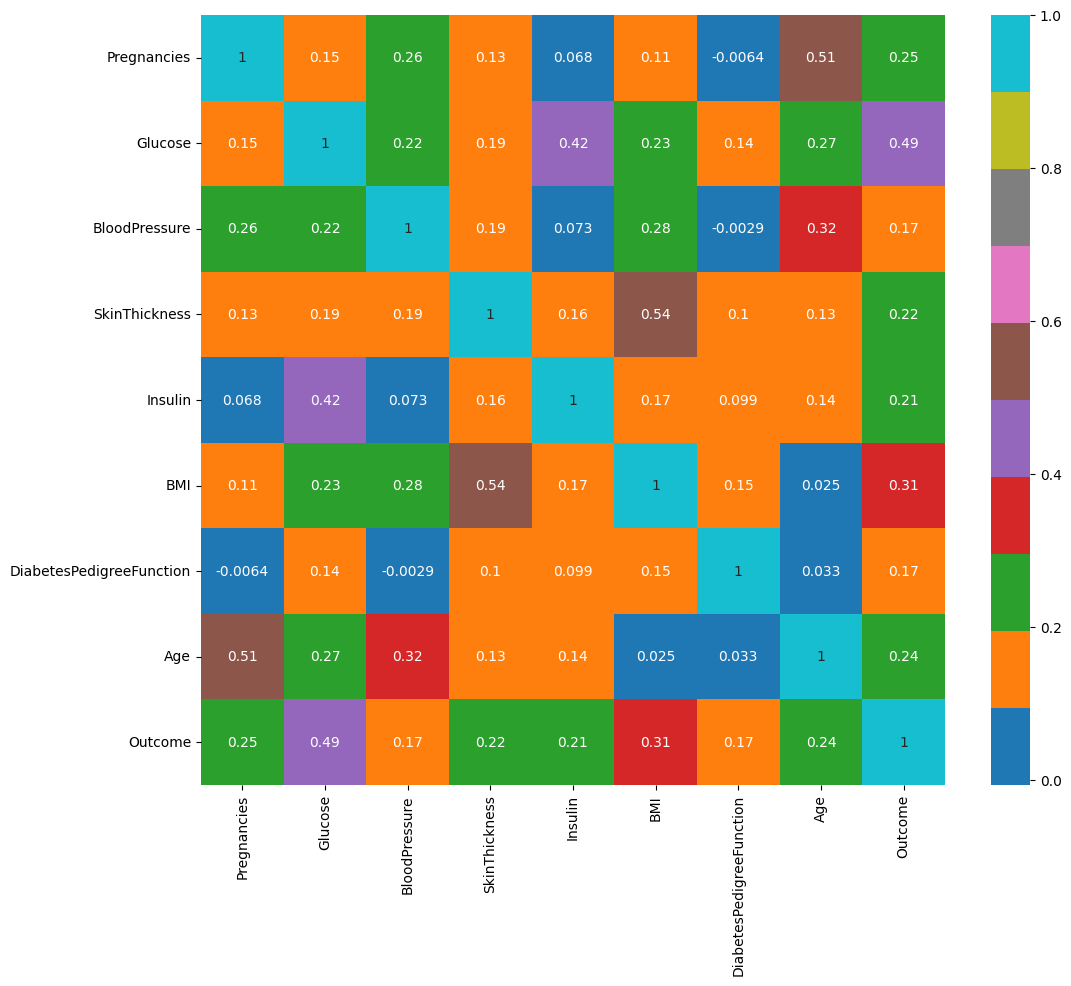

In [71]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap = 'tab10')

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
DF = pd.DataFrame(sc.fit_transform(df.iloc[:, :-1]), columns=['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
DF

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.504918,0.864372,-3.379092e-02,6.659106e-01,-3.345079e-16,0.165905,4.679427e-01,1.425565
1,-1.178143,-1.208100,-5.301445e-01,-1.707463e-02,-3.345079e-16,-0.852977,-3.657320e-01,-0.191903
2,1.178143,2.015745,-6.955957e-01,4.044085e-16,-3.345079e-16,-1.333307,6.038680e-01,-0.106773
3,-1.178143,-1.076514,-5.301445e-01,-7.000598e-01,-7.243887e-01,-0.634645,-9.215152e-01,-1.043202
4,0.000000,0.502512,-2.681010e+00,6.659106e-01,1.465506e-01,1.548674,5.485094e+00,-0.021643
...,...,...,...,...,...,...,...,...
763,1.851367,-0.681758,2.971115e-01,2.145712e+00,2.877840e-01,0.064017,-9.094329e-01,2.532254
764,-0.841530,0.009066,-1.992421e-01,-2.447364e-01,-3.345079e-16,0.631680,-3.989582e-01,-0.532423
765,0.168306,-0.023830,-3.379092e-02,-7.000598e-01,-5.125386e-01,-0.911199,-6.859114e-01,-0.277033
766,-1.178143,0.140651,-1.026498e+00,4.044085e-16,-3.345079e-16,-0.343536,-3.717731e-01,1.170175


In [82]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.12, random_state=7)

DECISION TREE CLASSIFICATION

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred1 = dt.predict(x_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,pred1)))

Accuracy Score = 0.7526881720430108


In [84]:
print(confusion_matrix(y_test, pred1))
print(classification_report(y_test,pred1))

[[44 13]
 [10 26]]
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79        57
         1.0       0.67      0.72      0.69        36

    accuracy                           0.75        93
   macro avg       0.74      0.75      0.74        93
weighted avg       0.76      0.75      0.75        93



RANDOM FOREST CLASSIFICATION

In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [110]:
import warnings
pred2= rfc.predict(x_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, pred2)))
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    pred2 = rfc.predict(x_test)

Accuracy_Score = 0.8064516129032258


In [98]:
print(confusion_matrix(y_test, pred2))
print(classification_report(y_test,pred2))

[[47 10]
 [ 8 28]]
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84        57
         1.0       0.74      0.78      0.76        36

    accuracy                           0.81        93
   macro avg       0.80      0.80      0.80        93
weighted avg       0.81      0.81      0.81        93



SUPPORT VECTOR MACHINE CLASSIFICATION

In [94]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [95]:
pred3 = svc.predict(x_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, pred3)))

Accuracy Score = 0.7634408602150538


In [97]:
print(confusion_matrix(y_test, pred3))
print(classification_report(y_test,pred3))

[[52  5]
 [17 19]]
              precision    recall  f1-score   support

         0.0       0.75      0.91      0.83        57
         1.0       0.79      0.53      0.63        36

    accuracy                           0.76        93
   macro avg       0.77      0.72      0.73        93
weighted avg       0.77      0.76      0.75        93



NAIVE BAYES CLASSIFICATION

In [106]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(x_train, y_train)

GaussianNB()

In [107]:
pred4 = nbc.predict(x_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, pred4)))

Accuracy Score = 0.7741935483870968


In [105]:
print(confusion_matrix(y_test, pred4))
print(classification_report(y_test,pred4))

[[47 10]
 [11 25]]
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82        57
         1.0       0.71      0.69      0.70        36

    accuracy                           0.77        93
   macro avg       0.76      0.76      0.76        93
weighted avg       0.77      0.77      0.77        93



EXAMPLE

In [111]:
rfc.predict([[8.0	,183 ,64 ,29.15 ,155.548223 ,23.3 ,0.672 ,32]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1.])